# Описание задания

**Цель лабораторной работы:** изучение способов предварительной обработки данных для дальнейшего формирования моделей



# Задание

1.	Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2.	Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
  *	обработку пропусков в данных;
  *	кодирование категориальных признаков;
  *	масштабирование данных.





# Ход выполнения лабораторной работы

In [0]:
from google.colab import drive, files
drive.mount('/content/drive')

Обновим seaborn до необходимой версии:

In [0]:
!pip install -U seaborn

Датасет представляет из себя проекты kickstarter, которые были опубликованы в январе 2018 года. Он содержит в себе данные о количестве требуемых денег, количестве полученных денег на момент февраля 2018 года.

In [0]:
from google.colab import files
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
os.listdir()
data = pd.read_csv('drive/My Drive/Files/dataset/master.csv', sep=",")

# Обработка пропущенных данных



## Нахождение колонок с пропущенными данными

In [4]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка HDI for year. Тип данных float64. Количество пустых значений 19456, 69.94%.


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


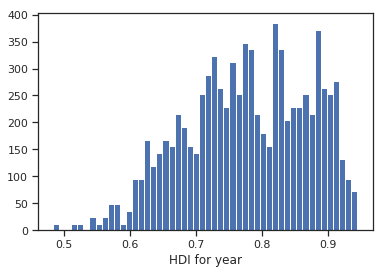

In [5]:
data_num = data[num_cols]
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

## Обработка пропущенных данных



### Простые стратегии

In [6]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((27820, 12), (27820, 11))

In [7]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((27820, 12), (8364, 12))

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

flt_index = data[data['HDI for year'].isnull()].index
data[data.index.isin(flt_index)][0:10]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [9]:
data_num_MasVnrArea = data_num[['HDI for year']]
data_num_MasVnrArea.head()

,HDI for year
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


### Импьютация

In [10]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [0]:
strategies=['mean', 'median','most_frequent']
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [12]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([0.77660115, 0.77660115, 0.77660115, ..., 0.77660115, 0.77660115,
        0.77660115]))

In [13]:
strategies[1], test_num_impute(strategies[1])

('median', array([0.779, 0.779, 0.779, ..., 0.779, 0.779, 0.779]))

In [14]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([0.713, 0.713, 0.713, ..., 0.713, 0.713, 0.713]))

# Преобразование категориальных данных



## Кодирование целочисленными значениями

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [16]:
cat_temp_data = data[['generation']]
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2
cat_enc = pd.DataFrame({'generation':data_imp2.T[0]})
cat_enc[0:10]

,generation
0,Generation X
1,Silent
2,Generation X
3,G.I. Generation
4,Boomers
5,G.I. Generation
6,Silent
7,Boomers
8,G.I. Generation
9,Generation X


In [17]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['generation'])
cat_enc['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [18]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5])

In [19]:
le.inverse_transform([0])

array(['Boomers'], dtype=object)


## One-hot encoding¶


In [20]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['generation']])
cat_enc.shape

(27820, 1)

In [21]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]])


# Масштабирование данных


## MinMax масштабирование

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


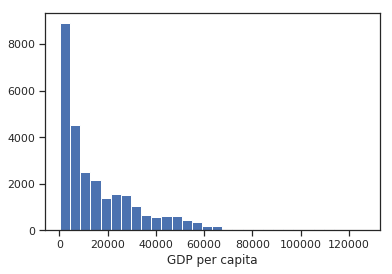

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['gdp_per_capita ($)']])

plt.hist(data['gdp_per_capita ($)'], 30)
plt.xlabel('GDP per capita')
plt.show()

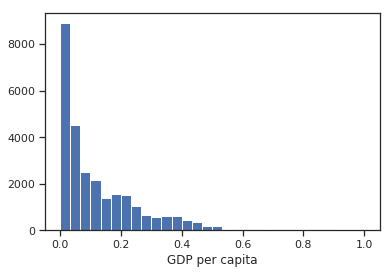

In [23]:
plt.hist(sc1_data, 30)
plt.xlabel('GDP per capita')
plt.show()

## Масштабирование данных на основе Z-оценки - StandardScaler

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


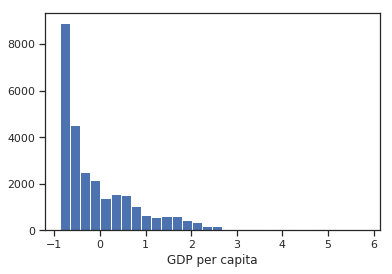

In [24]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['gdp_per_capita ($)']])

plt.hist(sc2_data, 30)
plt.xlabel('GDP per capita')
plt.show()

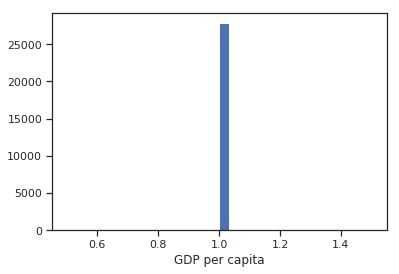

In [25]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['gdp_per_capita ($)']])

plt.hist(sc3_data, 30)
plt.xlabel('GDP per capita')
plt.show()